# Tabular Prototype

By Monday 6/30, make an attempt at formulating and "solving" your proposed problem.

## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm for now. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.



In [5]:
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv("true_cost_fast_fashion.csv")

df.head()


,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
0,Shein,Indonesia,2017,574.51,19.31,16,11421.58,282.11,616.63,143.79,...,4655,3435,0.05,Neutral,608.51,0.49,29.12,61.19,13.95,1.46
1,Forever 21,Vietnam,2024,394.50,9.30,20,5571.01,289.22,795.11,167.78,...,9655,6285,-0.12,Positive,689.49,0.21,49.52,3.44,90.93,1.29
2,Uniqlo,India,2024,310.23,25.46,11,10969.00,116.39,364.33,97.81,...,8016,387,0.08,Neutral,439.78,0.63,96.53,60.70,27.60,1.48
3,Forever 21,USA,2017,218.65,13.17,13,13093.00,255.88,632.16,134.54,...,8254,1620,-0.06,Neutral,746.70,0.21,71.32,76.08,56.13,3.85
4,Zara,Indonesia,2016,1005.84,15.40,20,9548.40,142.07,830.10,144.33,...,1778,3292,-0.59,Neutral,571.42,0.95,59.89,69.48,88.05,3.12


In [9]:
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")


Duplicate rows found: 0


In [11]:
optional_drop_cols = [
    'Instagram_Mentions_Thousands', 'TikTok_Mentions_Thousands',
    'Avg_Spend_Per_Customer_USD', 'Shopping_Frequency_Per_Year',
    'GDP_Contribution_Million_USD', 'Return_Rate_Percent',  
    'Sustainability_Score'
]

df_ml = df.drop(columns=[col for col in optional_drop_cols if col in df.columns])


In [13]:
categorical_raw = ['Social_Sentiment_Label']
df_ml = df_ml.drop(columns=[col for col in categorical_raw if col in df_ml.columns])


In [15]:
print("Final features going into the model:")
print(df_ml.columns.tolist())


Final features going into the model:
['Brand', 'Country', 'Year', 'Monthly_Production_Tonnes', 'Avg_Item_Price_USD', 'Release_Cycles_Per_Year', 'Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres', 'Landfill_Waste_Tonnes', 'Avg_Worker_Wage_USD', 'Working_Hours_Per_Week', 'Child_Labor_Incidents', 'Sentiment_Score', 'Env_Cost_Index', 'Transparency_Index', 'Compliance_Score', 'Ethical_Rating']


In [17]:
from sklearn.preprocessing import MinMaxScaler

features_positive = ['Avg_Worker_Wage_USD', 'Compliance_Score']
features_negative = ['Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres',
                     'Landfill_Waste_Tonnes', 'Child_Labor_Incidents',
                     'Working_Hours_Per_Week', 'Env_Cost_Index']

all_features = features_positive + features_negative

df_score = df[all_features].dropna()

# Normalize features
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_score), columns=all_features)

# Invert negative-impact features so that higher = better
for col in features_negative:
    df_scaled[col] = 1 - df_scaled[col]

df_scaled['Sustainability_Score_New'] = df_scaled.mean(axis=1)

df['Sustainability_Score_New'] = df_scaled['Sustainability_Score_New']



In [19]:
print(df.columns)
print(df['Sustainability_Score_New'].describe())


Index(['Brand', 'Country', 'Year', 'Monthly_Production_Tonnes',
       'Avg_Item_Price_USD', 'Release_Cycles_Per_Year',
       'Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres',
       'Landfill_Waste_Tonnes', 'Avg_Worker_Wage_USD',
       'Working_Hours_Per_Week', 'Child_Labor_Incidents',
       'Return_Rate_Percent', 'Avg_Spend_Per_Customer_USD',
       'Shopping_Frequency_Per_Year', 'Instagram_Mentions_Thousands',
       'TikTok_Mentions_Thousands', 'Sentiment_Score',
       'Social_Sentiment_Label', 'GDP_Contribution_Million_USD',
       'Env_Cost_Index', 'Sustainability_Score', 'Transparency_Index',
       'Compliance_Score', 'Ethical_Rating', 'Sustainability_Score_New'],
      dtype='object')
count    3000.000000
mean        0.532095
std         0.075371
min         0.284929
25%         0.479599
50%         0.533469
75%         0.584687
max         0.783189
Name: Sustainability_Score_New, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Sustainability_Score_New'])  # Features only
y = df['Sustainability_Score_New']                 # Target

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Check shapes
print(f"Train: {X_train.shape}")
print(f"Validation: {X_val.shape}")
print(f"Test: {X_test.shape}")


Train: (1800, 25)
Validation: (600, 25)
Test: (600, 25)


In [29]:
non_numeric_cols = X_train.select_dtypes(include='object').columns
print("Non-numeric columns:", non_numeric_cols.tolist())


Non-numeric columns: ['Brand', 'Country', 'Social_Sentiment_Label']


In [31]:
X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=non_numeric_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [33]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [37]:
# Predict on validation data
y_pred = model.predict(X_val)


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MAE: 0.0000
RMSE: 0.0000
R²: 1.0000


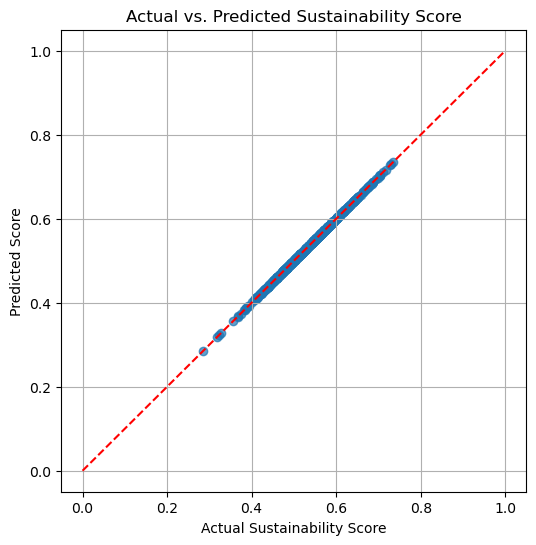

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.7)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual Sustainability Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs. Predicted Sustainability Score")
plt.grid(True)
plt.show()


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R² Score: 1.0000


In [45]:
y_pred_clipped = np.clip(y_pred, 0, 1)

kaggle_rmse = np.sqrt(mean_squared_error(y_val, y_pred_clipped))
print(f"Kaggle-style RMSE (clipped to [0, 1]): {kaggle_rmse:.4f}")


Kaggle-style RMSE (clipped to [0, 1]): 0.0000


In [49]:
pred_df = X_val.copy()
pred_df['Actual'] = y_val
pred_df['Predicted'] = y_pred
pred_df.to_csv("validation_predictions.csv", index=False)
